## An Exact Formula for the Spherical Beam Expansion in Ray-Cone-Tracing-based Automotive Radar Sensor Models

On this page you will find further information about our Communication-Paper. We used GeoGebra to implement our formulas for the caustic distance as well as the opening angle of the reflected beam to demonstrate the inaccuracies that come along with the approximation formulas introduced by Kouyoumjian in 1963 and Hirsenkorn in 2017. You might have to reload the applet first.

Furthermore, we used Python's SymPy package to ensure that the exact formulas cannot be simplified anymore. Finally, we write down a closed formula for the caustic distance and the opening angle in terms of the radius $r$, the angle of incidence $\theta_0$, the initial opening angle $\Delta\alpha$ and the length of the incoming ray $p$.

At the end of the page, you can find our code for the analysis of the approximation error and Fig. 3 (slightly amended).

Note:

<ol>
  <li>The index "measured" means that the value is computed numerically by GeoGebra.</li>
  <li>The index "analytic" means that the value is computed analytically with the formulas derived in our paper.</li>
  <li>The index "approx" means that the value is computed with the formulas introduced by Kouyoumjian in 1963 and Hirsenkorn in 2017.</li>
</ol>

In [2]:
import IPython
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

iframe = '<iframe \
           scrolling="no" \
           src="https://www.geogebra.org/m/e8sf48gr" \
           width="1600" \
           height="1000" \
           style="border:0px;"> \
          </iframe>'

IPython.display.HTML(iframe)

In the following we show that the formulas cannot be simpliefied appropriately. 

In [2]:
from sympy import *
init_printing()

r, l, z = symbols('r l z')

For simplification we substituted:
$
z = \theta_0+\Delta\alpha
$
and
$
l = \frac{p \sin\left(\Delta\alpha\right)}{\sin\left(z\right)}
$

##### Point of Impact (x, y)

$x$- and $y$-coordinates are given as

$$
\begin{align}
x_+ &= \frac{\left(r + l\right) \tan^{2}{\left (z \right )} + \sqrt{r^{2} \left(1 + \tan^{2}{\left (z \right )}\right) - \left(r + l\right)^{2} \tan^{2}{\left (z \right )}}}{1 + \tan^{2}{\left (z \right )}} \\[2em]
y_+ &= \frac{\left(r + l\right) \tan{\left (z \right )} - \sqrt{r^{2} \left(1 + \tan^{2}{\left (z \right )}\right) - \left(r + l\right)^{2} \tan^{2}{\left (z \right )}} \tan{\left (z \right )}}{1 + \tan^{2}{\left (z \right )}}
\end{align}
$$

Write the formula in Pythonic style for SymPy:

In [3]:
x_ = ((r+l)*tan(-z)**2 + sqrt(r**2 * (tan(-z)**2 + 1) - tan(-z)**2 * (r+l)**2)) / (tan(-z)**2 + 1)
y_ = (-(r+l)*tan(-z) + tan(-z) * sqrt(r**2 * (tan(-z)**2 + 1) - tan(-z)**2 * (r+l)**2)) / (tan(-z)**2 + 1)

Simplified expression of x_: 


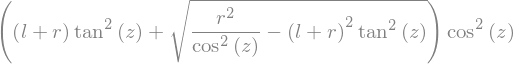

Simplified expression of y_: 


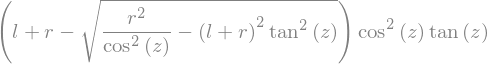

In [4]:
print('Simplified expression of x_: ')
display(simplify(x_))

print('Simplified expression of y_: ')
display(simplify(y_))

This step is not necessary, but already shows that there is (probably) no meaningful simplification. Now let's write down the formula for the angle of incidence $\theta_1$:

$$
\begin{align}
\theta_1 &= \operatorname{acos}\left ( \frac{x_+ - y_+ \tan(z)}{r\sqrt{1+\tan^2(z)}} \right ) \\[2em]
&= \operatorname{acos}{\left (\frac{\left(l + r\right) \tan^{2}{\left (z \right )} + \sqrt{r^{2} \left(\tan^{2}{\left (z \right )} + 1\right) - \left(l + r\right)^{2} \tan^{2}{\left (z \right )}}
+ \tan(z)\left( \left(l + r\right) \tan{\left (z \right )} - \sqrt{r^{2} \left(\tan^{2}{\left (z \right )} + 1\right) - \left(l + r\right)^{2} \tan^{2}{\left (z \right )}} \tan{\left (z \right )} \right)}{r \left(\tan^{2}{\left (z \right )} + 1\right)^{3/2}} \right )}
\end{align}
$$

And again for SymPy and try to simplifiy it:

Simplified expression of the incidence angle: 


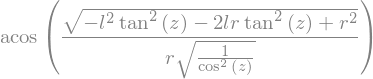

In [5]:
theta_1 = acos((x_ + y_ * tan(-z)) / (r * sqrt(1 + tan(-z)**2)))

print('Simplified expression of the incidence angle: ')
display(simplify(theta_1))

And we see, SymPy does not find a meaningful simplification. Let's check if $\gamma$ can be simplified:

Simplified expression of gamma = atan(y_+ / x_+): 


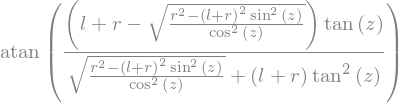

In [6]:
print('Simplified expression of gamma = atan(y_+ / x_+): ')
display(simplify(atan(y_ / x_)))

SymPy does not find meaningful simplifications for any formula. Therefore, we write down the formulas from our paper in terms of the radius $r$, the angle of incidence $\theta_0$, the initial opening angle $\Delta\alpha$ and the length of the incoming ray $p$. It can already be said, that both formulas become very large expressions!

$$
\begin{align}
\Delta\alpha' &= \theta_1 + \operatorname{atan}\left (\frac{y_+}{x_+}\right ) - \theta_0\\[2em]
&= \operatorname{acos}\left( \sqrt{1- \left(2+\frac{l}{r}\right)\frac{l}{r}\tan^2\left(z\right)}\cos(z) \right)
+ \operatorname{atan}{\left (\frac{\left(l + r\right) \tan^{2}{\left (z \right )} + \sqrt{r^{2} \left(\tan^{2}{\left (z \right )} + 1\right) - \left(l + r\right)^{2} \tan^{2}{\left (z \right )}}}{\left(l + r\right) \tan{\left (z \right )} - \sqrt{r^{2} \left(\tan^{2}{\left (z \right )} + 1\right) - \left(l + r\right)^{2} \tan^{2}{\left (z \right )}} \tan{\left (z \right )}} \right )}
- \theta_0\\[2em]
&= \operatorname{acos}\left( \sqrt{1- \left(2+\frac{l}{r}\right)\frac{l}{r}\tan^2\left(z\right)}\cos(z) \right)
+ \operatorname{atan}{\left (\frac{\left(l + r - \sqrt{\frac{r^{2}}{\cos^{2}{\left (z \right )}} - \left(l + r\right)^{2} \tan^{2}{\left (z \right )}}\right) \tan{\left (z \right )}}{\left(l + r\right) \tan^{2}{\left (z \right )} + \sqrt{\frac{r^{2}}{\cos^{2}{\left (z \right )}} - \left(l + r\right)^{2} \tan^{2}{\left (z \right )}}} \right )}
- \theta_0\\[2em]
&= \operatorname{acos}\left( \sqrt{1- \left(2+\frac{p \sin{\left (\Delta\alpha \right )}}{r \sin{\left (\Delta\alpha + \theta_0 \right )}}\right)\frac{p \sin{\left (\Delta\alpha \right )}}{r\sin{\left (\Delta\alpha + \theta_0 \right )}}\tan^2\left(\theta_0+\Delta\alpha\right)}\cos(\theta_0+\Delta\alpha) \right)
+ \operatorname{atan}{\left (\frac{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r - \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}\right) \tan{\left (\Delta\alpha + \theta_0 \right )}}{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right) \tan^{2}{\left (\Delta\alpha + \theta_0 \right )} + \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}} \right )}
- \theta_0
\end{align}
$$

<br>
<br>
<br>
<br>

<font size="2">
$$
\begin{align}
q &= \operatorname{dist}((r, 0), (x_q, y_q)) \\[2em]
&= \frac{(r-x_+)\tan\left(\theta_1 + \gamma\right) + y_+}{\tan\left(\theta_0\right) - \tan\left(\theta_1 + \gamma\right)} \sqrt{1+\tan^2\left(\theta_0\right)} \\[2em]
&= \left(\frac{\left(r - \frac{p \sin\left(\Delta\alpha\right)}{\sin\left(\Delta\alpha + \theta_0\right)} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )} - \sqrt{r^{2} - \frac{p \sin\left(\Delta\alpha\right)}{\sin\left(\Delta\alpha + \theta_0\right)} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )} {\left (2r + \frac{p \sin\left(\Delta\alpha\right)}{\sin\left(\Delta\alpha + \theta_0\right)} \right )} }\right) \cos^{2}{\left (\Delta\alpha + \theta_0 \right )}\tan\left(\operatorname{acos}\left( \sqrt{1- \left(2+\frac{p \sin{\left (\Delta\alpha \right )}}{r \sin{\left (\Delta\alpha + \theta_0 \right )}}\right)\frac{p \sin{\left (\Delta\alpha \right )}}{r\sin{\left (\Delta\alpha + \theta_0 \right )}}\tan^2\left(\theta_0+\Delta\alpha\right)}\cos(\theta_0+\Delta\alpha) \right) + \operatorname{atan}{\left (\frac{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r - \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}\right) \tan{\left (\Delta\alpha + \theta_0 \right )}}{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right) \tan^{2}{\left (\Delta\alpha + \theta_0 \right )} + \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}} \right )}\right)}{\tan\left(\theta_0\right) - \tan\left(\operatorname{acos}\left( \sqrt{1- \left(2+\frac{p \sin{\left (\Delta\alpha \right )}}{r \sin{\left (\Delta\alpha + \theta_0 \right )}}\right)\frac{p \sin{\left (\Delta\alpha \right )}}{r\sin{\left (\Delta\alpha + \theta_0 \right )}}\tan^2\left(\theta_0+\Delta\alpha\right)}\cos(\theta_0+\Delta\alpha) \right) + \operatorname{atan}{\left (\frac{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r - \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}\right) \tan{\left (\Delta\alpha + \theta_0 \right )}}{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right) \tan^{2}{\left (\Delta\alpha + \theta_0 \right )} + \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}} \right )}\right)} \right.\\[2em]
%
&\phantom{=}\qquad+ \left.\frac{\left(\left(\frac{p \sin\left(\Delta\alpha\right)}{\sin\left(\theta_0+\Delta\alpha\right)} + r\right)\cos(\theta_0+\Delta\alpha) - \sqrt{r^{2} - \left(\frac{p \sin\left(\Delta\alpha\right)}{\sin\left(\theta_0+\Delta\alpha\right)} + r\right)^{2} \sin^{2}{\left (\theta_0+\Delta\alpha \right )}}\right) \sin{\left (\theta_0+\Delta\alpha \right )}}{\tan\left(\theta_0\right) - \tan\left(\operatorname{acos}\left( \sqrt{1- \left(2+\frac{p \sin{\left (\Delta\alpha \right )}}{r \sin{\left (\Delta\alpha + \theta_0 \right )}}\right)\frac{p \sin{\left (\Delta\alpha \right )}}{r\sin{\left (\Delta\alpha + \theta_0 \right )}}\tan^2\left(\theta_0+\Delta\alpha\right)}\cos(\theta_0+\Delta\alpha) \right) + \operatorname{atan}{\left (\frac{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r - \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}\right) \tan{\left (\Delta\alpha + \theta_0 \right )}}{\left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right) \tan^{2}{\left (\Delta\alpha + \theta_0 \right )} + \sqrt{\frac{r^{2}}{\cos^{2}{\left (\Delta\alpha + \theta_0 \right )}} - \left(\frac{p \sin{\left (\Delta\alpha \right )}}{\sin{\left (\Delta\alpha + \theta_0 \right )}} + r\right)^{2} \tan^{2}{\left (\Delta\alpha + \theta_0 \right )}}} \right )}\right)} \right)
\sqrt{1+\tan^2\left(\theta_0\right)}
\end{align}
$$
</font>

<br>
<br>
<br>

#### Code for the Analysis of the Approximation Error and Fig. 3 (slightly amended) 

In [7]:
import numpy as np

###
r = 7.
p = 30.

# Angle range
theta_0_ = np.linspace(0, 75, 3000) * np.pi / 180.
delta_alpha_ = np.linspace(0.000001, 1, 3000) * np.pi / 180.

theta_0, delta_alpha = np.meshgrid(theta_0_, delta_alpha_) 

# Some pre-computations to simplify the equations
r_plus_l = r + p*np.sin(delta_alpha) / np.sin(theta_0 + delta_alpha)
t_alpha = np.tan(theta_0 + delta_alpha)
sqrt = np.sqrt(r**2 * (1+t_alpha**2) - r_plus_l**2 * t_alpha**2)

# Calculating (x_+, y_+)
x_plus = (r_plus_l * t_alpha**2 + sqrt) / (1 + t_alpha**2)
y_plus = (r_plus_l * t_alpha - sqrt * t_alpha) / (1 + t_alpha**2)

# Caclculating the incidence angle \theta_1 and finally \Delta\alpha'
theta_1 = np.arccos((x_plus - y_plus * t_alpha) / (r * np.sqrt(1 + t_alpha**2)))
gamma = np.arctan(y_plus / x_plus)
delta_alpha_prime = theta_1 + gamma - theta_0

# Compute approximation error for \Delta\alpha'
delta_alpha_prime_approx = (1 + 2*p / (r*np.cos(theta_0_))) * delta_alpha
delta_alpha_prime_error = np.abs(delta_alpha_prime - delta_alpha_prime_approx) / np.abs(delta_alpha_prime)

# Caclculating the caustic distance q
q = np.abs(((r - x_plus)*np.tan(theta_1 + gamma) + y_plus) / (np.tan(theta_0) - np.tan(theta_1 + gamma)) * np.sqrt(1 + np.tan(theta_0)**2))

q_approx = 1.0 / (1.0/p + 2.0/(r*np.cos(theta_0)))
q_error = np.abs(q - q_approx) / np.abs(q)

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
from matplotlib.patches import PathPatch
import mpl_toolkits.mplot3d.art3d as art3d

# Change color of grid
plt.rcParams['grid.color'] = "#F5F5F5"

# Use LaTeX font style
plt.rc('text', usetex=True )
plt.rc('font', family='Times New Roman',  size=18)
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')

# For a fancy way to display axis labels
# see https://stackoverflow.com/a/37423823
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, scale=(1.,1.), usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1]).scale(scale[0], scale[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [9]:
# Define a new mapping for the colorbar
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    def get_levels(self, levels):
        x, y = [self.vmin, self.vmax / 2., self.vmax], [self.vmin, self.vcenter, self.vmax]
        return [np.interp(level, x, y) for level in levels]

In [10]:
# New colormap for projected plots
my_cmap = plt.cm.RdBu(np.linspace(0.67, 1, 128))
my_cmap = colors.LinearSegmentedColormap.from_list('my_colormap', my_cmap)

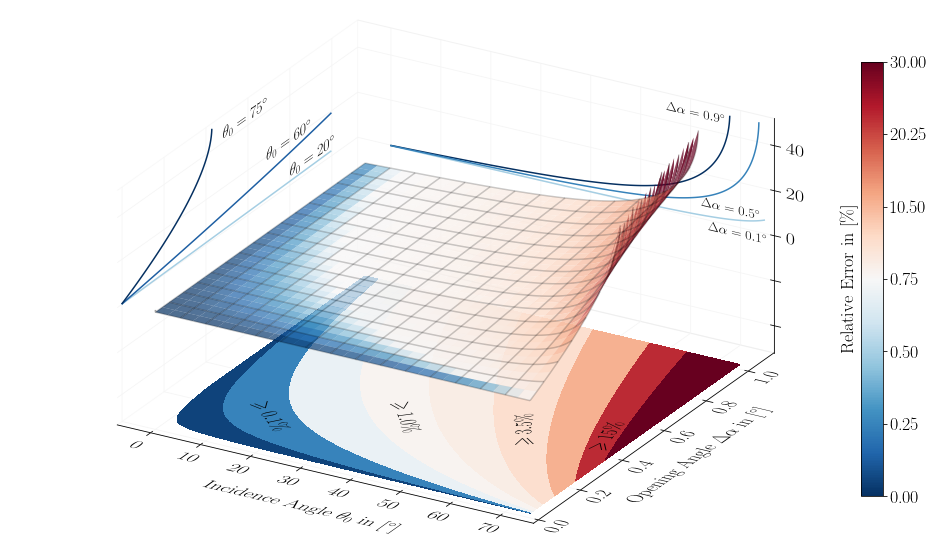

In [11]:
X = theta_0 * 180. / np.pi
Y = delta_alpha * 180. / np.pi
Z = delta_alpha_prime_error * 100
Z[np.isnan(Z)] = np.nanmax(Z)

Z_surface = Z.copy()
Z_surface[Z_surface>50] = np.inf

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

# Plot projection (graph in x and y direction)
cset = ax.contour(X, Y, Z_surface, [20, 60, 75], zdir='x', offset=-6.75, cmap=my_cmap)
csety = ax.contour(X, Y, Z_surface, [0.1, 0.5, 0.9], zdir='y', offset=1.12, cmap=my_cmap)

# Plot contour at the bottom
midnorm = MidpointNormalize(vmin=0, vmax=30, vcenter=0.75)
cset = ax.contourf(X, Y, Z, [0.01, 0.1, 0.4, 1, 2, 3.75, 7.5, 15, 30, 100], zdir='z', offset=-50, cmap=cm.RdBu_r, norm=midnorm)

# Plot surface and wireframe
surf = ax.plot_surface(X, Y, Z_surface, rstride=100, cstride=100, alpha=0.7, cmap=cm.RdBu_r, norm=midnorm, shade=True, edgecolor='None', linewidth=0, antialiased=True)
wireframe = ax.plot_wireframe(X, Y, Z_surface, rstride=200, cstride=200, edgecolor='black',  alpha=0.2)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cm.RdBu_r, norm=plt.Normalize(vmin=0, vmax=30))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.8, pad=0)

# Re-scale colorbar
levels = [0., 5., 10., 15., 20., 25., 30.]
cbar.set_ticks(levels)
cbar.set_ticklabels([r'%.2f' % level for level in midnorm.get_levels(levels)])

# Label colorbar
cbar.ax.set_ylabel(r'Relative Error in $\left[\%\right]$', rotation=90, labelpad=-87)

# Set limits
ax.set_xlim(-5, 75)
ax.set_ylim(0, 1.1)
ax.set_zlim(-50, 50)

# Change x ticklabel font to LaTeX style
x_labels = np.arange(0, 71, 10)
ax.set_xticks(x_labels)
ax.set_xticklabels(['']*len(x_labels))

# Change y ticklabel font to LaTeX style
y_labels = np.arange(0, 1.1, 0.2)
ax.set_yticks(y_labels)
ax.set_yticklabels(['']*len(y_labels))

# Remove negative tick values on z-axis
ax.set_zticks([-20, -40, 0, 20, 40])
ax.set_zticklabels(['']*5)
for tick in ax.zaxis.get_ticklines()[:3]:
    tick.set_visible(False)

# Set point of view
ax.view_init(elev=40., azim=-60)
ax.set_proj_type('ortho')

# Remove background color
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

text3d(ax, (20, -16, -50), r'Incidence Angle $\theta_0$ in $[^\circ]$', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (89, 11, -50), r'Opening Angle $\Delta\alpha$ in $[^\circ]$', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")

# labels contour
text3d(ax, (10, 14, -50), r'$\geqslant 0.1\%$', zdir="z", size=4, scale=(1.,0.016), angle=-.21*3.14159, usetex=True, ec="none", fc="k")
text3d(ax, (31, 24.6, -50), r'$\geqslant 1.0\%$', zdir="z", size=4, scale=(1.,0.016), angle=-.26*3.14159, usetex=True, ec="none", fc="k")
text3d(ax, (60.6, 21.5, -50), r'$\geqslant 3.5\%$', zdir="z", size=4, scale=(1.,0.016), angle=.68*3.14159, usetex=True, ec="none", fc="k")
text3d(ax, (72.7, 25, -50), r'$\geqslant 15\%$', zdir="z", size=4, scale=(1.,0.016), angle=.58*3.14159, usetex=True, ec="none", fc="k")

# labels projection x=0
text3d(ax, (40, 10, 0), r'$\theta_0 = 20^\circ$', zdir="x", size=4, scale=(.016,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (33, 18, 0), r'$\theta_0 = 60^\circ$', zdir="x", size=4, scale=(.016,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (20, 31, 0), r'$\theta_0 = 75^\circ$', zdir="x", size=4, scale=(.016,1.8), usetex=True, ec="none", fc="k")

# labels projection y
text3d(ax, (92, 1.1, -3/1.8), r'$\Delta\alpha = 0.1^\circ$', zdir="y", size=4, scale=(0.7,1.4), usetex=True, ec="none", fc="k")
text3d(ax, (90, 1.1, 10/1.8), r'$\Delta\alpha = 0.5^\circ$', zdir="y", size=4, scale=(0.7,1.4), usetex=True, ec="none", fc="k")
text3d(ax, (80, 1.1, 60/1.8), r'$\Delta\alpha = 0.9^\circ$', zdir="y", size=4, scale=(0.7,1.4), usetex=True, ec="none", fc="k")

# labels for x-axis
text3d(ax, (0.5, -9, -50), r'0', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (10, -9, -50), r'10', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (20, -9, -50), r'20', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (30, -9, -50), r'30', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (40, -9, -50), r'40', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (50, -9, -50), r'50', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (60, -9, -50), r'60', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (70, -9, -50), r'70', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")

# labels for y-axis
text3d(ax, (83, -4.5, -50), r'0.0', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 8, -50), r'0.2', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 20.5, -50), r'0.4', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 33, -50), r'0.6', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 45.5, -50), r'0.8', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 58, -50), r'1.0', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")

# labels for z-axis
text3d(ax, (80, 1.1, 0), r'0', zdir="y", size=4, scale=(1.,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (80, 1.1, 20/1.8), r'20', zdir="y", size=4, scale=(1.,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (80, 1.1, 40/1.8), r'40', zdir="y", size=4, scale=(1.,1.8), usetex=True, ec="none", fc="k")

#plt.savefig('error_alpha_.png', format='png', dpi=300, transparent=True)
plt.show()

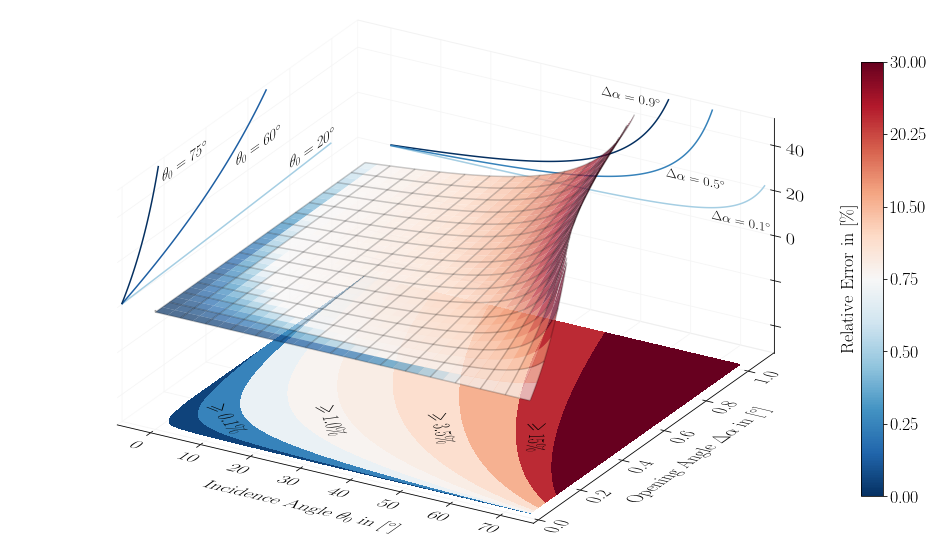

In [14]:
X = theta_0 * 180. / np.pi
Y = delta_alpha * 180. / np.pi
Z = q_error * 100
Z[np.isnan(Z)] = np.nanmax(Z)
Z[Z>100.] = 100.

Z_surface = Z.copy()
Z_surface[Z_surface>50] = np.inf

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

# Plot projection (graph in x and y direction)
cset = ax.contour(X, Y, Z_surface, [20, 60, 75], zdir='x', offset=-6.75, cmap=my_cmap)
csety = ax.contour(X, Y, Z_surface, [0.1, 0.5, 0.9], zdir='y', offset=1.12, cmap=my_cmap)

# Plot contour at the bottom
midnorm = MidpointNormalize(vmin=0, vmax=30, vcenter=0.75)
cset = ax.contourf(X, Y, Z, [0.01, 0.1, 0.4, 1, 2, 3.75, 7.5, 15, 30, 100], zdir='z', offset=-50, cmap=cm.RdBu_r, norm=midnorm)

# Plot surface and wireframe
surf = ax.plot_surface(X, Y, Z_surface, rstride=100, cstride=100, alpha=0.7, cmap=cm.RdBu_r, norm=midnorm, shade=True, edgecolor='None', linewidth=0, antialiased=True)
wireframe = ax.plot_wireframe(X, Y, Z_surface, rstride=200, cstride=200, edgecolor='black',  alpha=0.2)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cm.RdBu_r, norm=plt.Normalize(vmin=0, vmax=30))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.8, pad=0)

# Re-scale colorbar
levels = [0., 5., 10., 15., 20., 25., 30.]
cbar.set_ticks(levels)
cbar.set_ticklabels([r'%.2f' % level for level in midnorm.get_levels(levels)])

# Label colorbar
cbar.ax.set_ylabel(r'Relative Error in $\left[\%\right]$', rotation=90, labelpad=-87)

# Set limits
ax.set_xlim(-5, 75)
ax.set_ylim(0, 1.1)
ax.set_zlim(-50, 50)

# Change x ticklabel font to LaTeX style
x_labels = np.arange(0, 71, 10)
ax.set_xticks(x_labels)
ax.set_xticklabels(['']*len(x_labels))

# Change y ticklabel font to LaTeX style
y_labels = np.arange(0, 1.1, 0.2)
ax.set_yticks(y_labels)
ax.set_yticklabels(['']*len(y_labels))

# Remove negative tick values on z-axis
ax.set_zticks([-20, -40, 0, 20, 40])
ax.set_zticklabels(['']*5)
for tick in ax.zaxis.get_ticklines()[:3]:
    tick.set_visible(False)

# Set point of view
ax.view_init(elev=40., azim=-60)
ax.set_proj_type('ortho')

# Remove background color
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

text3d(ax, (20, -16, -50), r'Incidence Angle $\theta_0$ in $[^\circ]$', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (89, 11, -50), r'Opening Angle $\Delta\alpha$ in $[^\circ]$', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")

# labels contour
text3d(ax, (4, 10, -50), r'$\geqslant 0.1\%$', zdir="z", size=4, scale=(1.,0.016), angle=-.21*3.14159, usetex=True, ec="none", fc="k")
text3d(ax, (20.5, 18, -50), r'$\geqslant 1.0\%$', zdir="z", size=4, scale=(1.,0.016), angle=-.26*3.14159, usetex=True, ec="none", fc="k")
text3d(ax, (39, 24, -50), r'$\geqslant 3.5\%$', zdir="z", size=4, scale=(1.,0.016), angle=-.28*3.14159, usetex=True, ec="none", fc="k")
text3d(ax, (56, 28.5, -50), r'$\geqslant 15\%$', zdir="z", size=4, scale=(1.,0.016), angle=-.33*3.14159, usetex=True, ec="none", fc="k")

# labels projection x=0
text3d(ax, (40, 12, 0), r'$\theta_0 = 20^\circ$', zdir="x", size=4, scale=(.016,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (24, 22, 0), r'$\theta_0 = 60^\circ$', zdir="x", size=4, scale=(.016,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (2, 31, 0), r'$\theta_0 = 75^\circ$', zdir="x", size=4, scale=(.016,1.8), usetex=True, ec="none", fc="k")

# labels projection y
text3d(ax, (93, 1.1, 4/1.8), r'$\Delta\alpha = 0.1^\circ$', zdir="y", size=4, scale=(0.7,1.4), usetex=True, ec="none", fc="k")
text3d(ax, (80, 1.1, 22/1.8), r'$\Delta\alpha = 0.5^\circ$', zdir="y", size=4, scale=(0.7,1.4), usetex=True, ec="none", fc="k")
text3d(ax, (61.5, 1.1, 60/1.8), r'$\Delta\alpha = 0.9^\circ$', zdir="y", size=4, scale=(0.7,1.4), usetex=True, ec="none", fc="k")

# labels for x-axis
text3d(ax, (0.5, -9, -50), r'0', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (10, -9, -50), r'10', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (20, -9, -50), r'20', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (30, -9, -50), r'30', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (40, -9, -50), r'40', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (50, -9, -50), r'50', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (60, -9, -50), r'60', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")
text3d(ax, (70, -9, -50), r'70', zdir="z", size=4, scale=(1.,0.016), usetex=True, ec="none", fc="k")

# labels for y-axis
text3d(ax, (83, -4.5, -50), r'0.0', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 8, -50), r'0.2', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 20.5, -50), r'0.4', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 33, -50), r'0.6', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 45.5, -50), r'0.8', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")
text3d(ax, (83, 58, -50), r'1.0', zdir="z", size=4, scale=(1.,0.016), usetex=True, angle=.5*3.14159, ec="none", fc="k")

# labels for z-axis
text3d(ax, (80, 1.1, 0), r'0', zdir="y", size=4, scale=(1.,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (80, 1.1, 20/1.8), r'20', zdir="y", size=4, scale=(1.,1.8), usetex=True, ec="none", fc="k")
text3d(ax, (80, 1.1, 40/1.8), r'40', zdir="y", size=4, scale=(1.,1.8), usetex=True, ec="none", fc="k")

#plt.savefig('error_q_.png', format='png', dpi=300, transparent=True)
plt.show()